In [1]:
import numpy as np

from scipy.stats import norm, gamma
from scipy.optimize import differential_evolution, minimize

import matplotlib.pyplot as plt
plt.style.use("/Users/jlazar/Downloads/paper.mplstyle")

In [2]:
a1true = 50
a2true = 35
loc1true = 2 
loc2true = 5 
scale1true = 0.5
scale2true = 1.5

scale = 5

times0 = np.append(
    np.random.normal(loc=loc1true, scale = scale1true, size=a1true),
    np.random.normal(loc=loc2true, scale = scale2true, size=a2true),
)
times1 = np.append(
    np.random.normal(loc=loc1true, scale = scale1true, size=a1true * scale),
    np.random.normal(loc=loc2true, scale = scale2true, size=a2true * scale),
)

In [3]:
def cumulative_value(times, t0):
    return (times < t0).sum()

## Compare the timing distributions

Let make sure they look roughly the same

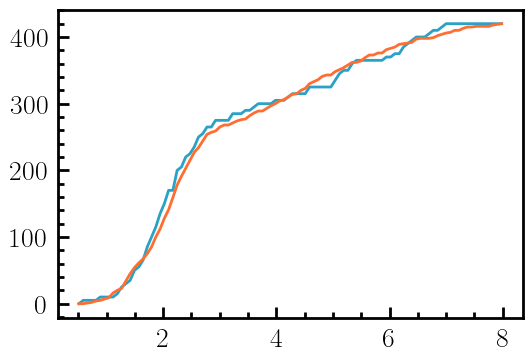

In [4]:
ts = np.linspace(times0.min(), times0.max(), 100)
plt.plot(ts, [scale * cumulative_value(times0, t) for t in ts])
plt.plot(ts, [cumulative_value(times1, t) for t in ts])
plt.show()

## Utility function for getting a scaled CDF of two $\Gamma$ distributions

In [5]:
def gamma_cdf(p):
    a1, a2, theta1, theta2, k1, k2, t1, t2 = p
    return lambda t: a1 * gamma.cdf(t - t1, theta1, k1) + a2 * gamma.cdf(t - t2, theta2, k2) 

In [6]:
def norm_cdf(p):
    a1, a2, loc1, loc2, scale1, scale2 = p
    return lambda t: a1 * norm.cdf(t, loc=loc1, scale=scale1) + a2 * norm.cdf(t, loc=loc2, scale=scale2)

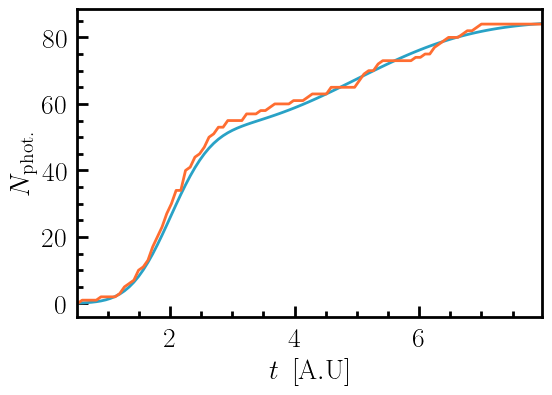

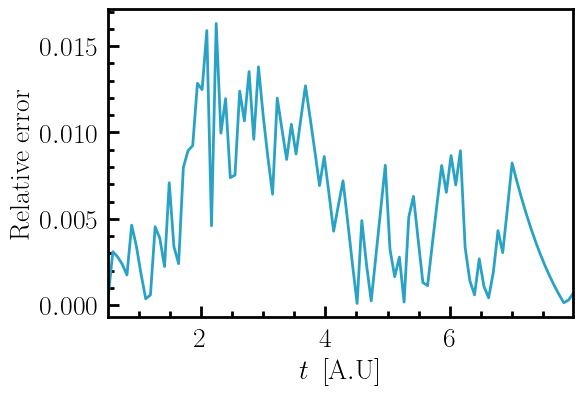

In [7]:
ptrue = (a1true, a2true, loc1true, loc2true, scale1true, scale2true)

plt.plot(ts, norm_cdf(ptrue)(ts))
plt.plot(ts, [cumulative_value(times0, t) for t in ts])
plt.xlim(ts.min(), ts.max())
plt.xlabel(r"$t~\left[\mathrm{A.U}\right]$")
plt.ylabel(r"$N_{\mathrm{phot.}}$")
plt.show()


gcdf = norm_cdf(ptrue)
f_ = lambda t: -np.abs(cumulative_value(times0, t) - gcdf(t))
plt.plot(ts, [-f_(t) / times0.sum() for t in ts])
plt.xlim(ts.min(), ts.max())
plt.xlabel(r"$t~\left[\mathrm{A.U}\right]$")
plt.ylabel(r"Relative error")
plt.show()

In [8]:
def f_test(times, p):
    a1, loc1, loc2, scale1, scale2 = p
    a2 = len(times) - a1
    gcdf = norm_cdf((a1, a2, loc1, loc2, scale1, scale2))
    f_ = lambda t: -np.abs(cumulative_value(times, t) - gcdf(t))
    res = differential_evolution(
        f_, 
        bounds=[(times.min(), times.max())]
    )
    # Uncomment this to experiment with using minimize
    # res = minimize(
    #     f_,
    #     (times.min()+times.max()) / 2,
    #     bounds=[(times.min(), times.max())],
    #     method="L-BFGS-B"
    # )
    return res

In [9]:
ts[np.argsort(np.gradient(np.gradient([cumulative_value(times0, t) for t in ts])))[:7]]

array([5.11411723, 5.41584857, 2.3231023 , 2.02137096, 0.51271424,
       4.58608738, 4.28435603])

20 iterations
(51.76946504479681, 33.23053495520319, 2.175666581158532, 5.119030566348919, 0.6556566525259172, 1.7820012242239383)
(50, 35, 2, 5, 0.5, 1.5)


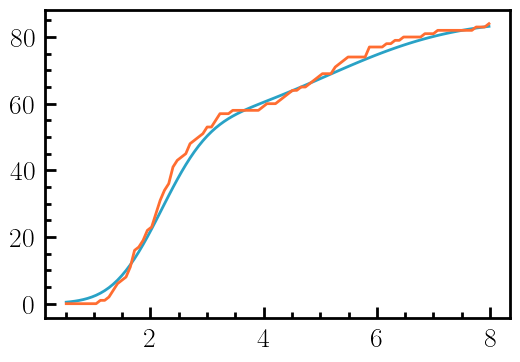

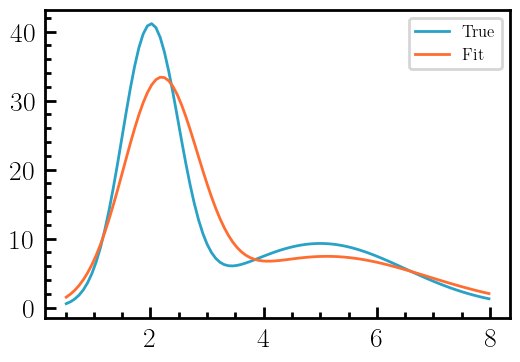

40 iterations
(55.15215074602113, 29.847849253978872, 2.1040827115858147, 5.126698678893564, 0.5899625228263979, 1.3878276346732878)
(50, 35, 2, 5, 0.5, 1.5)


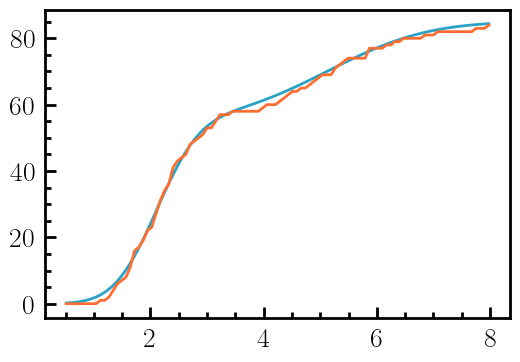

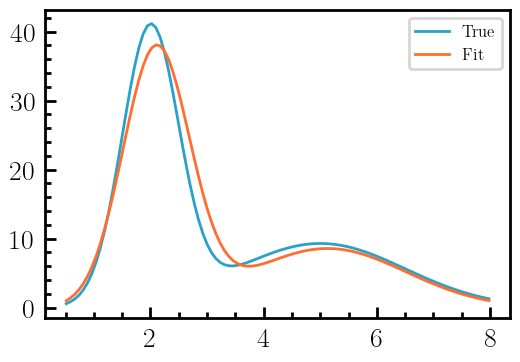

60 iterations
(55.15215074602113, 29.847849253978872, 2.1040827115858147, 5.212492264348, 0.5899625228263979, 1.3878276346732878)
(50, 35, 2, 5, 0.5, 1.5)


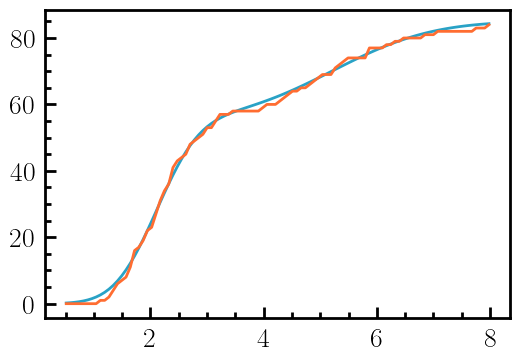

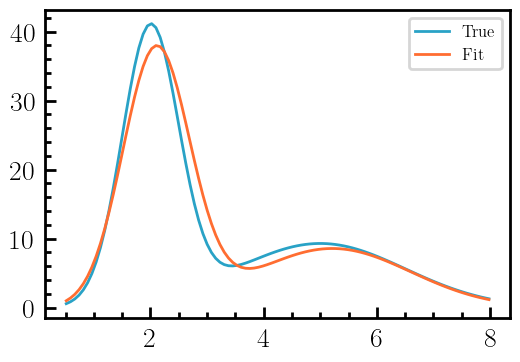

80 iterations
(55.421273747903655, 29.578726252096345, 2.1040827115858147, 5.212492264348, 0.5899625228263979, 1.3878276346732878)
(50, 35, 2, 5, 0.5, 1.5)


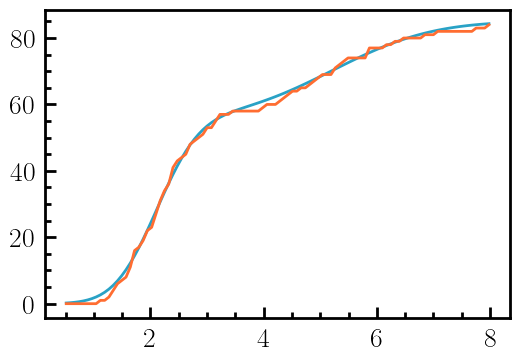

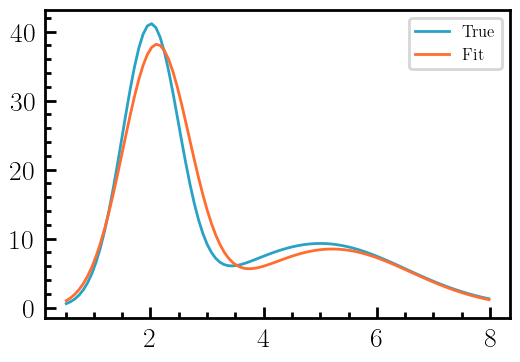

100 iterations
(54.33522926767719, 30.664770732322808, 2.1040827115858147, 5.244161832227039, 0.5450963525788544, 1.0182119946461115)
(50, 35, 2, 5, 0.5, 1.5)


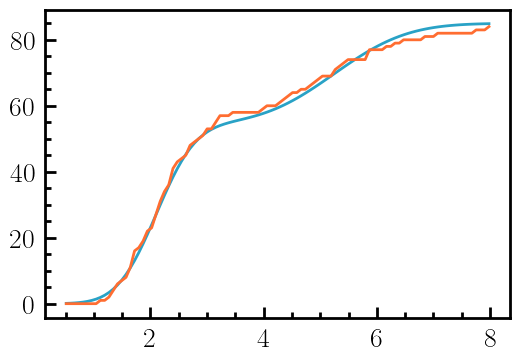

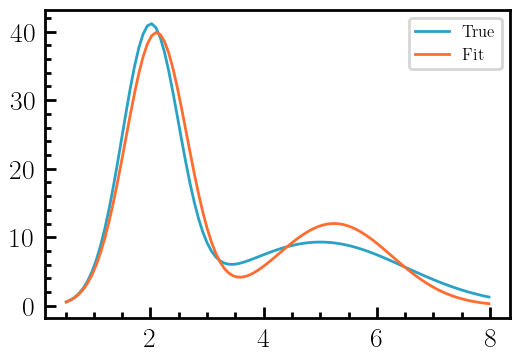

20 iterations
(54.547670860756924, 30.452329139243076, 1.9203149126175532, 4.6176673786961375, 0.5802523779209136, 1.4589751884455737)
(50, 35, 2, 5, 0.5, 1.5)


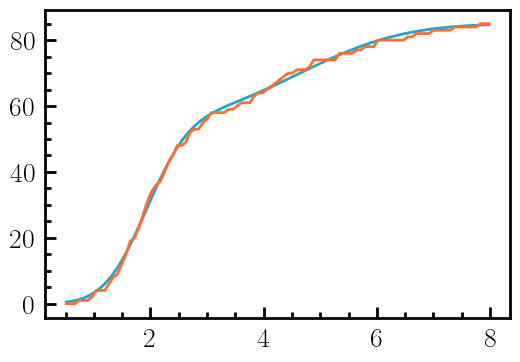

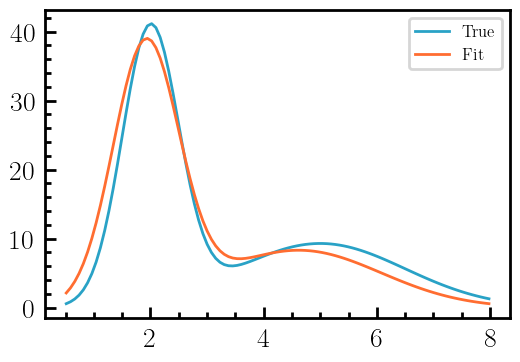

40 iterations
(54.547670860756924, 30.452329139243076, 1.920314912617553, 4.6176673786961375, 0.5802523779209136, 1.4224865759478658)
(50, 35, 2, 5, 0.5, 1.5)


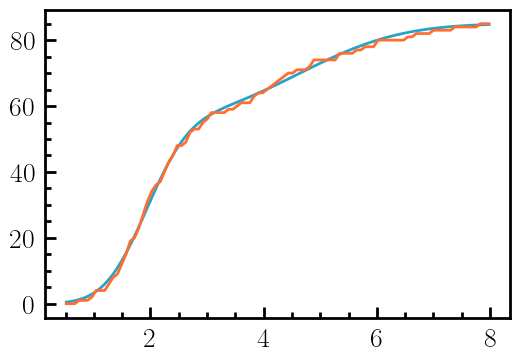

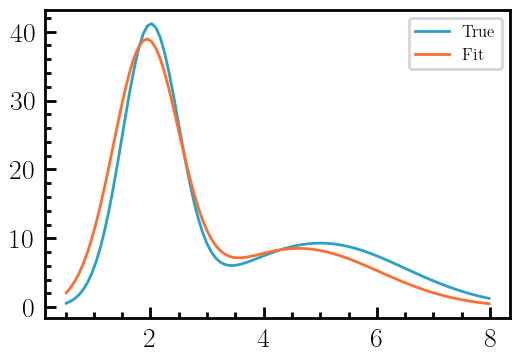

60 iterations
(54.547670860756924, 30.452329139243076, 1.920314912617553, 4.6176673786961375, 0.5802523779209136, 1.4224865759478658)
(50, 35, 2, 5, 0.5, 1.5)


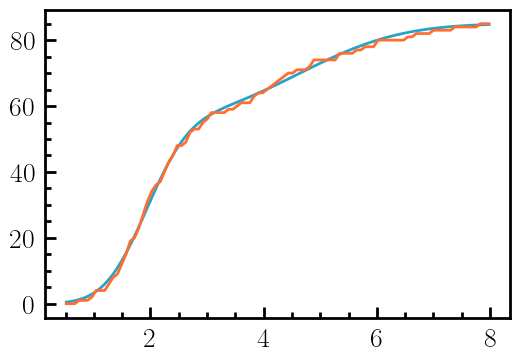

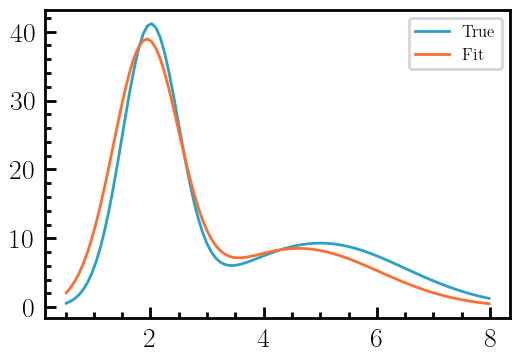

80 iterations
(54.547670860756924, 30.452329139243076, 1.920314912617553, 4.6176673786961375, 0.5802523779209136, 1.4224865759478658)
(50, 35, 2, 5, 0.5, 1.5)


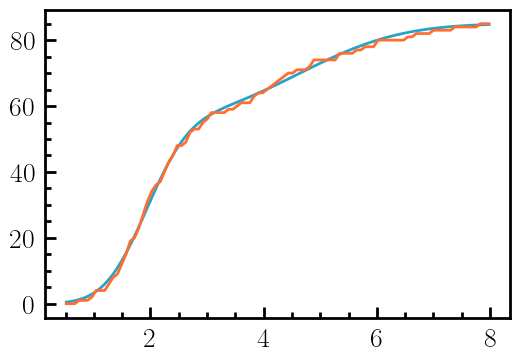

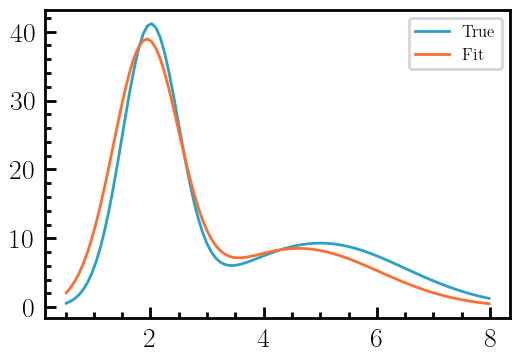

100 iterations
(54.547670860756924, 30.452329139243076, 1.920314912617553, 4.6176673786961375, 0.5802523779209136, 1.4224865759478658)
(50, 35, 2, 5, 0.5, 1.5)


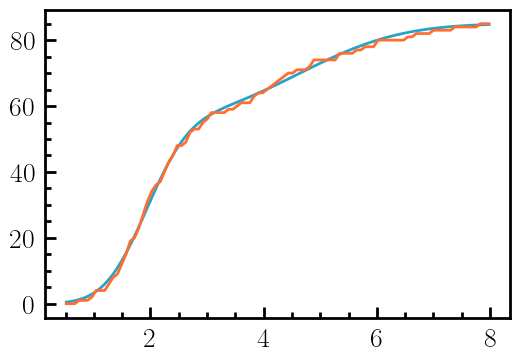

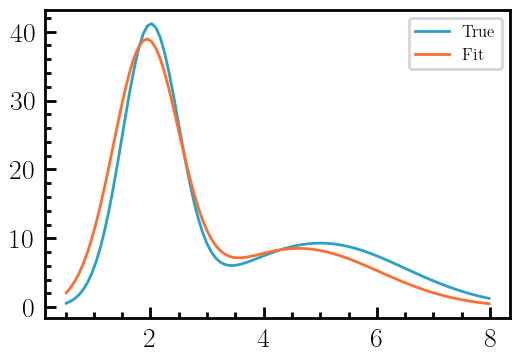

20 iterations
(40.65197490857928, 44.34802509142072, 1.9299999999999997, 4.361947091028747, 0.4963140719227187, 1.6)
(50, 35, 2, 5, 0.5, 1.5)


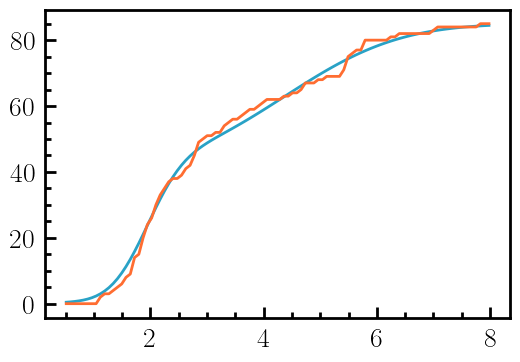

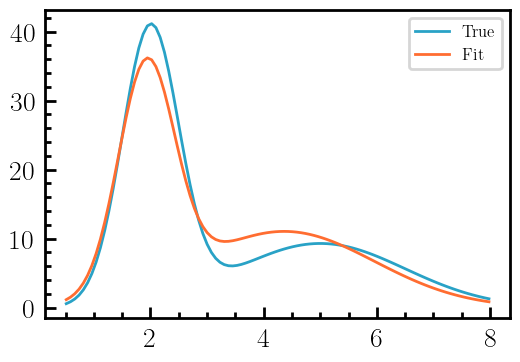

40 iterations
(42.653470566886575, 42.346529433113425, 2.0402295992807997, 4.3831438802385065, 0.5376374573011884, 1.7393525882774599)
(50, 35, 2, 5, 0.5, 1.5)


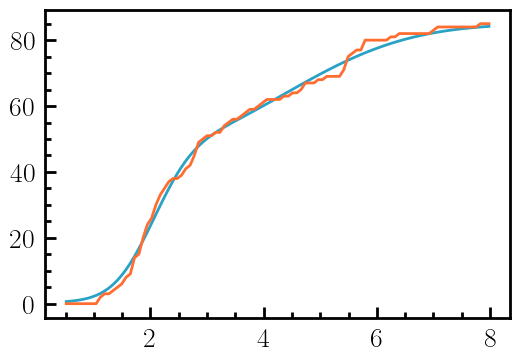

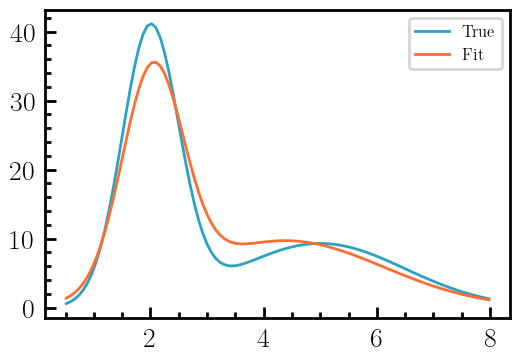

60 iterations
(42.653470566886575, 42.346529433113425, 2.0449048802676923, 4.3831438802385065, 0.5868401556293938, 1.7393525882774599)
(50, 35, 2, 5, 0.5, 1.5)


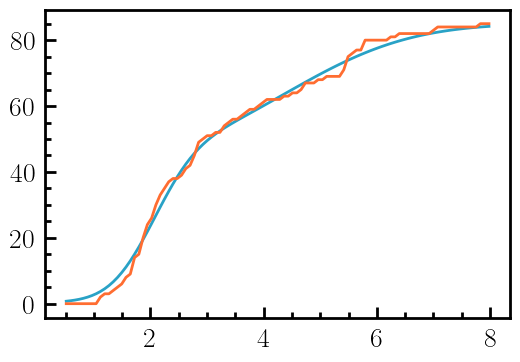

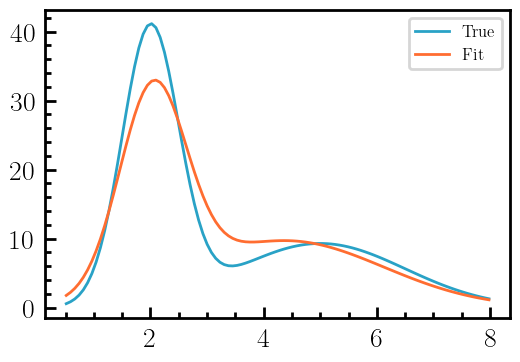

80 iterations
(42.653470566886575, 42.346529433113425, 2.0449048802676923, 4.3831438802385065, 0.5868401556293938, 1.7298569323207487)
(50, 35, 2, 5, 0.5, 1.5)


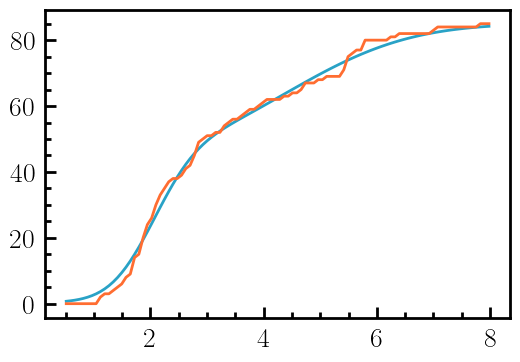

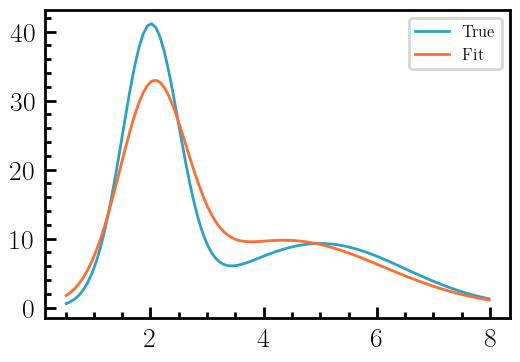

100 iterations
(40.786924731149256, 44.213075268850744, 2.0185925654748655, 4.322457696987526, 0.4786955026558857, 1.7187214479381856)
(50, 35, 2, 5, 0.5, 1.5)


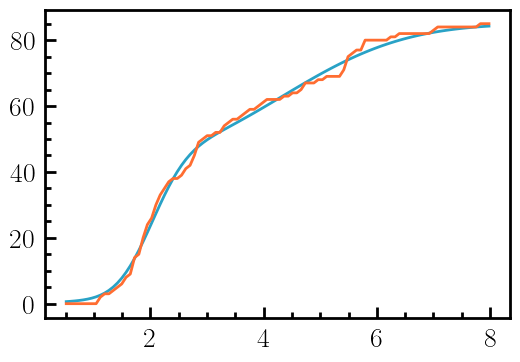

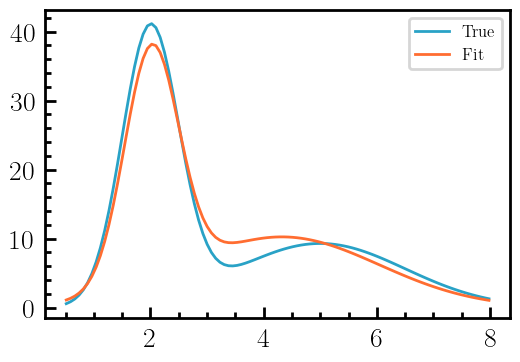

20 iterations
(58.26874271364368, 26.731257286356318, 2.1152557678486175, 5.526305801330876, 0.8123319570037016, 1.7995851594924748)
(50, 35, 2, 5, 0.5, 1.5)


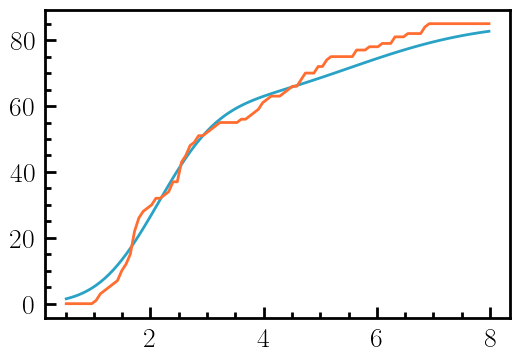

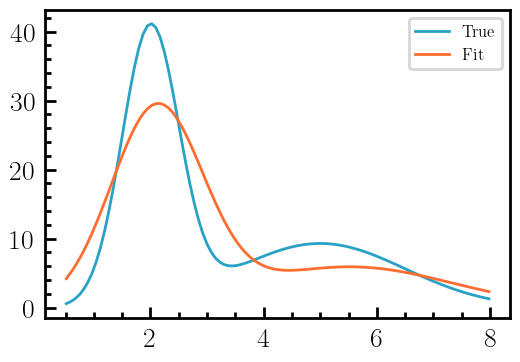

40 iterations
(51.3182817457022, 33.6817182542978, 1.9308057383179027, 4.762066266889576, 0.6857236889467273, 0.958452057429862)
(50, 35, 2, 5, 0.5, 1.5)


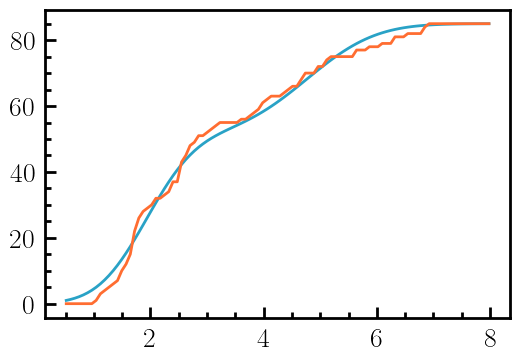

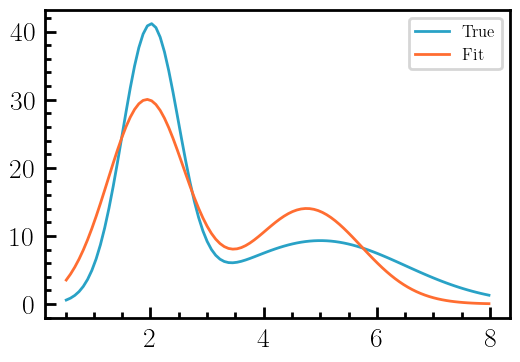

60 iterations
(51.31828556793801, 33.68171443206199, 1.9308066493067386, 4.762065491117708, 0.685724267573427, 0.9584517675380503)
(50, 35, 2, 5, 0.5, 1.5)


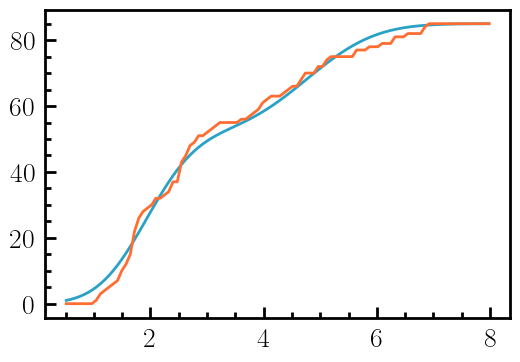

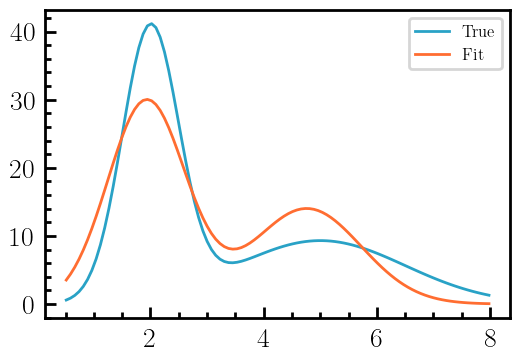

80 iterations
(51.318262318406916, 33.681737681593084, 1.9308109187247775, 4.76206803544642, 0.6857234728742579, 0.9584540309086973)
(50, 35, 2, 5, 0.5, 1.5)


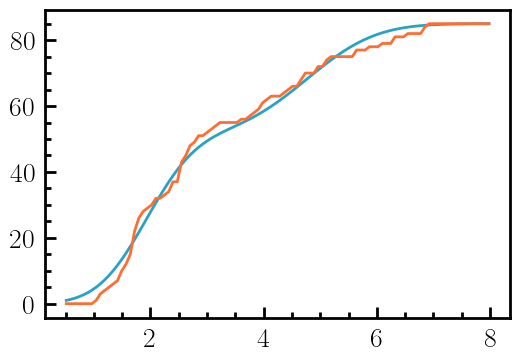

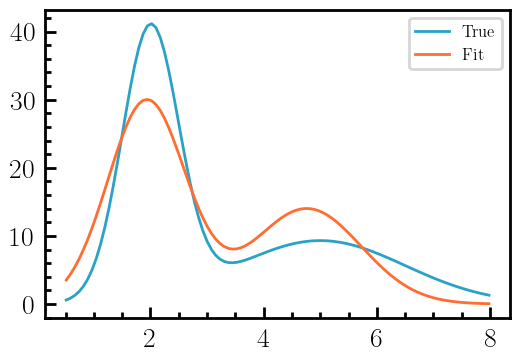

100 iterations
(51.318262318406916, 33.681737681593084, 1.9308109187247773, 4.76206803544642, 0.6857234728742579, 0.8327702247131253)
(50, 35, 2, 5, 0.5, 1.5)


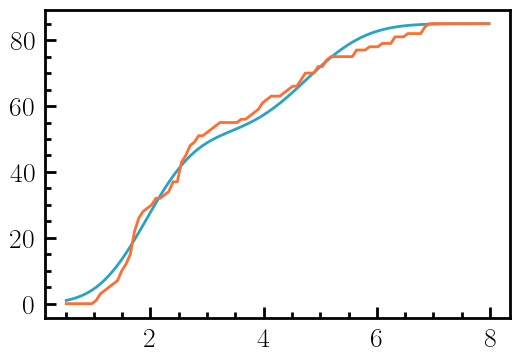

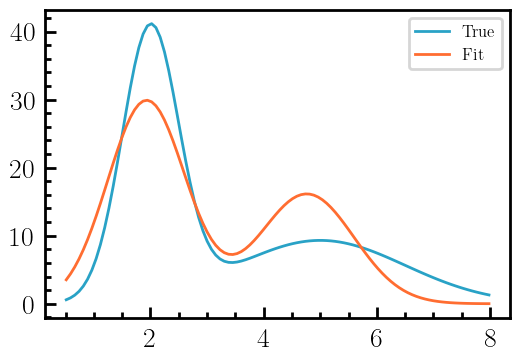

20 iterations
(50.34844229100354, 34.65155770899646, 1.9662432644626036, 5.30977389670131, 0.6774776790245862, 1.4566491262727816)
(50, 35, 2, 5, 0.5, 1.5)


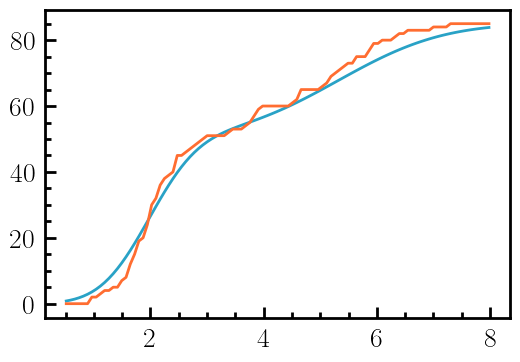

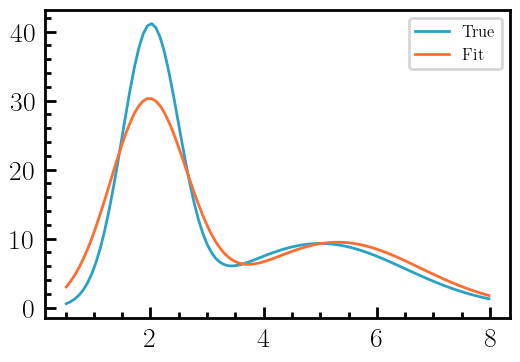

40 iterations
(51.1912115304619, 33.8087884695381, 1.9333474849007466, 5.0204870870331115, 0.46802450973749427, 1.039478221164971)
(50, 35, 2, 5, 0.5, 1.5)


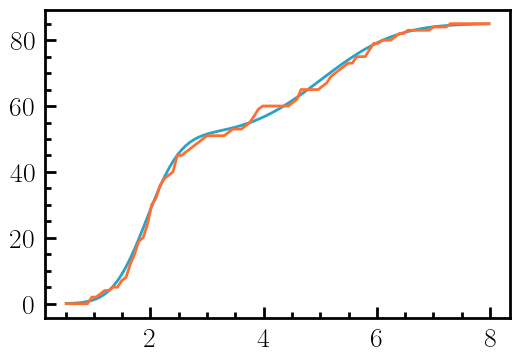

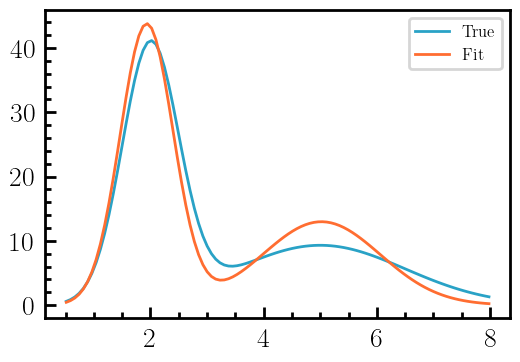

60 iterations
(51.492599044282244, 33.507400955717756, 1.9333474849007466, 5.0204870870331115, 0.4680245097374942, 1.039478221164971)
(50, 35, 2, 5, 0.5, 1.5)


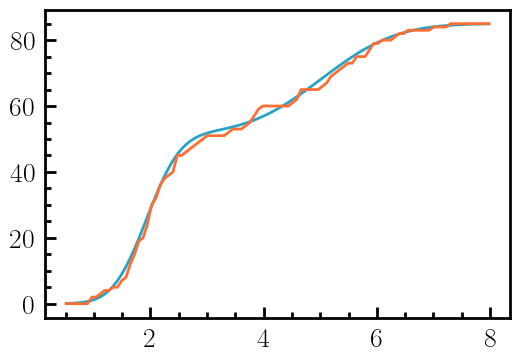

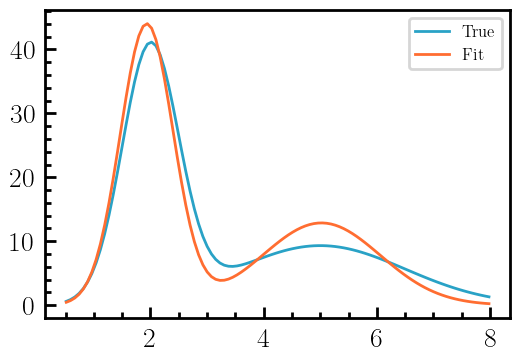

80 iterations
(51.767755528181446, 33.232244471818554, 1.9333474849007466, 5.0204870870331115, 0.48335363409156384, 1.039478221164971)
(50, 35, 2, 5, 0.5, 1.5)


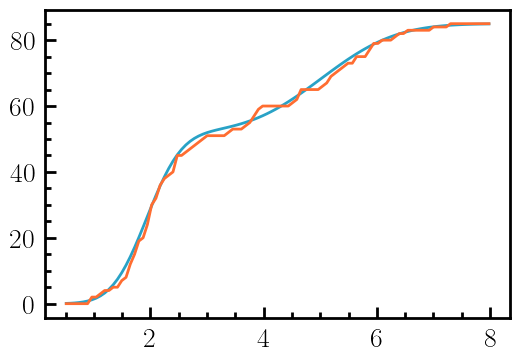

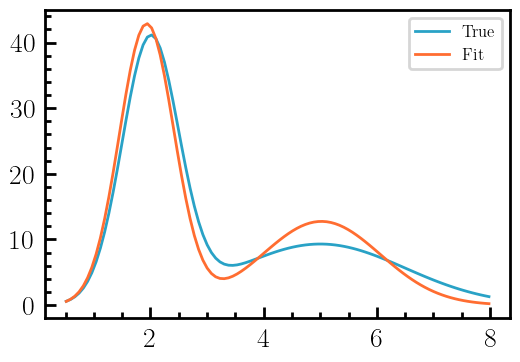

100 iterations
(51.767755528181446, 33.232244471818554, 1.9333474849007466, 5.0204870870331115, 0.48335363409156384, 1.039478221164971)
(50, 35, 2, 5, 0.5, 1.5)


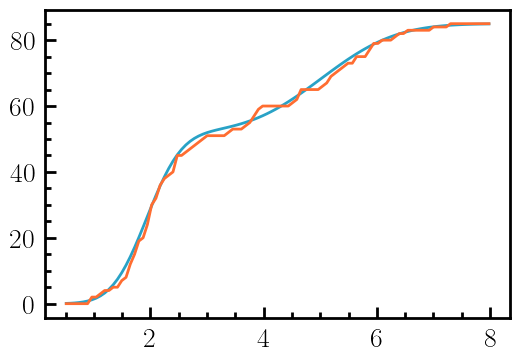

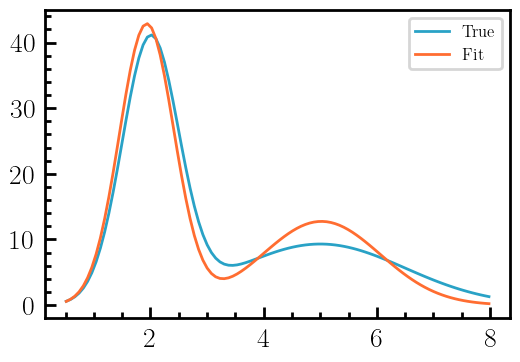

20 iterations
(44.33805780548041, 40.66194219451959, 1.9283221701038578, 4.61263958463784, 0.43060388144988204, 1.8196964450522342)
(50, 35, 2, 5, 0.5, 1.5)


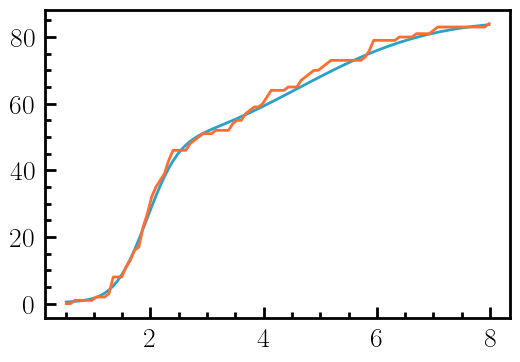

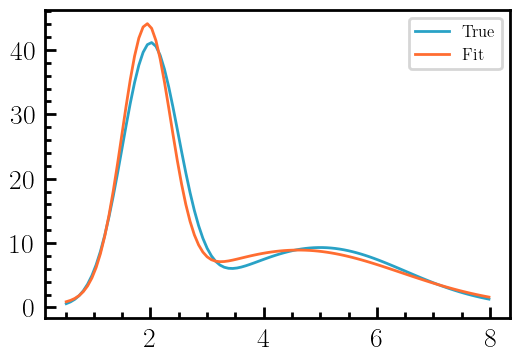

40 iterations
(44.33805780548041, 40.66194219451959, 1.9283221701038578, 4.61263958463784, 0.43060388144988204, 1.7886673792971286)
(50, 35, 2, 5, 0.5, 1.5)


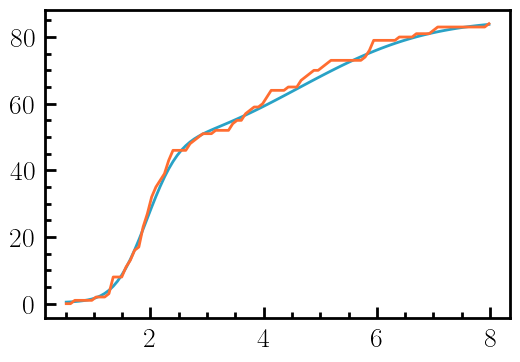

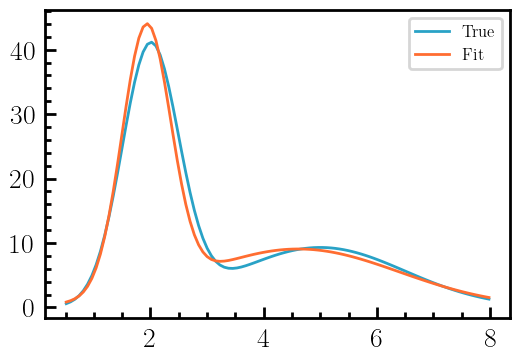

60 iterations
(44.33805780548041, 40.66194219451959, 1.9283221701038578, 4.61263958463784, 0.43060388144988204, 1.8182654351555576)
(50, 35, 2, 5, 0.5, 1.5)


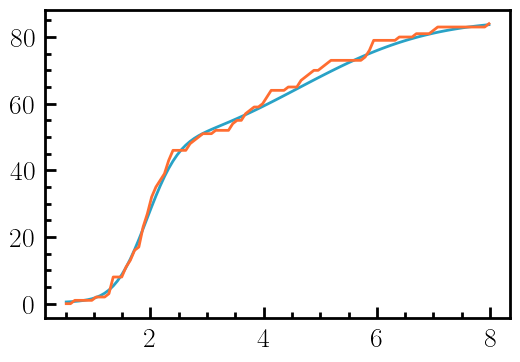

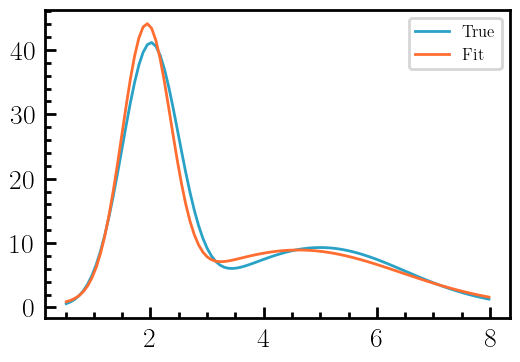

80 iterations
(44.33805335758036, 40.66194664241964, 1.9283240892630114, 4.526773204571515, 0.4306053000767578, 1.818263928305341)
(50, 35, 2, 5, 0.5, 1.5)


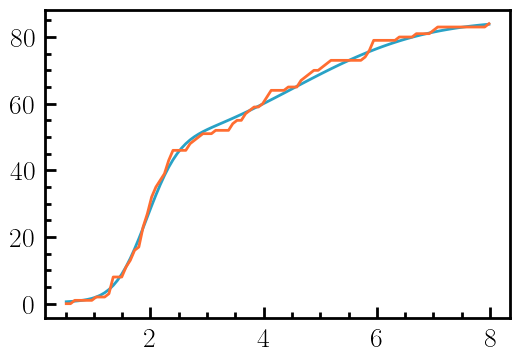

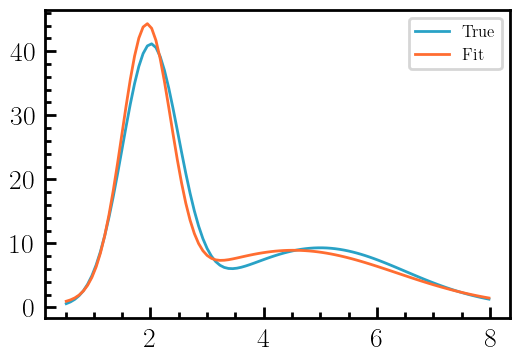

100 iterations
(44.11813854813557, 40.88186145186443, 1.928324918993075, 4.526773794615814, 0.4306052477678308, 1.818264001092731)
(50, 35, 2, 5, 0.5, 1.5)


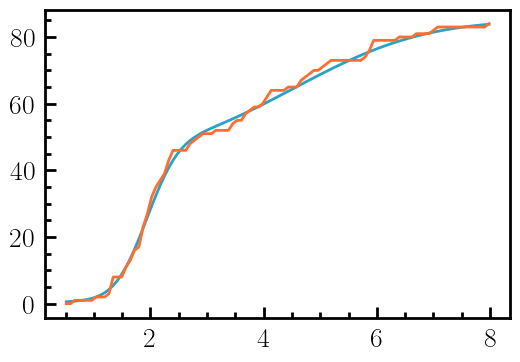

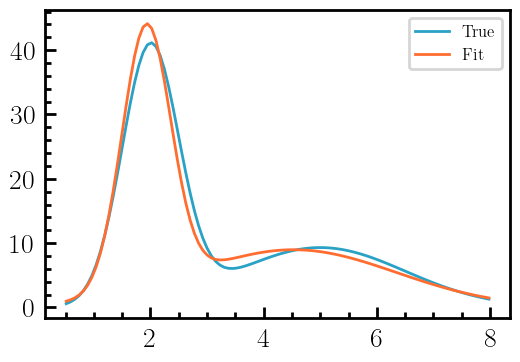

20 iterations
(51.93598012468793, 33.06401987531207, 2.0726205343498703, 5.207842872112667, 0.536852317105517, 1.759222777154605)
(50, 35, 2, 5, 0.5, 1.5)


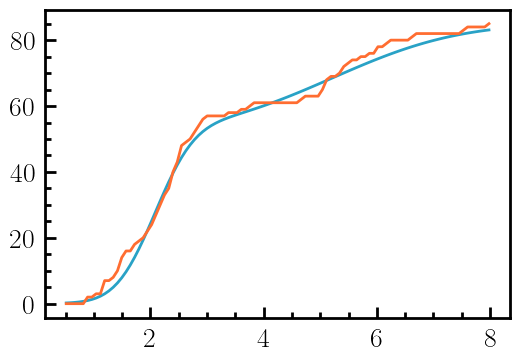

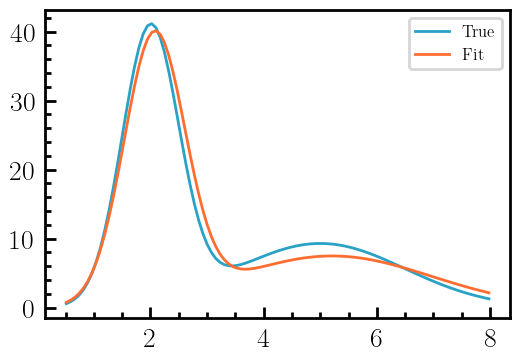

40 iterations
(53.29372612923469, 31.70627387076531, 2.0419496801171846, 5.207842872112667, 0.536852317105517, 1.9793865013418017)
(50, 35, 2, 5, 0.5, 1.5)


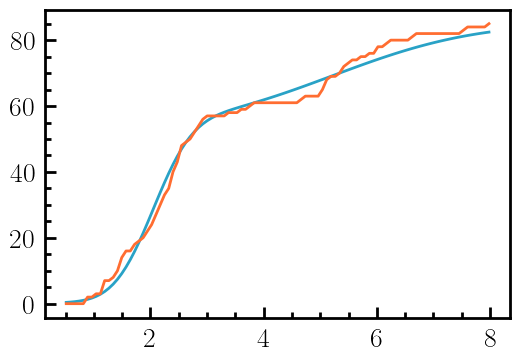

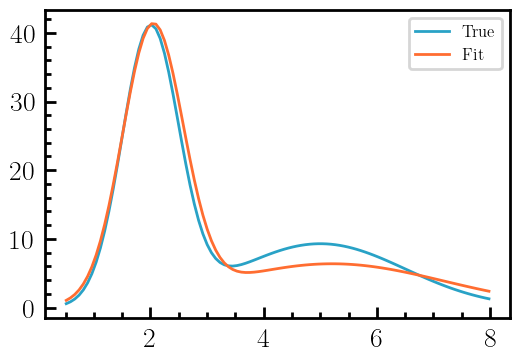

60 iterations
(53.29372612923469, 31.70627387076531, 1.9659853826343316, 5.207842872112667, 0.536852317105517, 1.9793865013418017)
(50, 35, 2, 5, 0.5, 1.5)


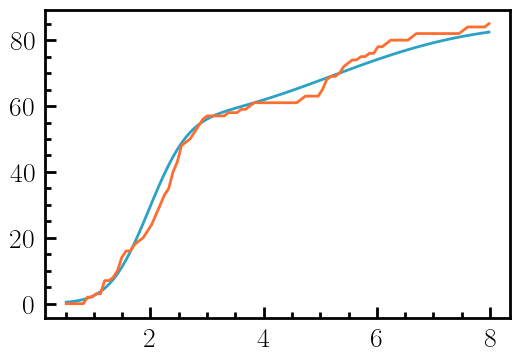

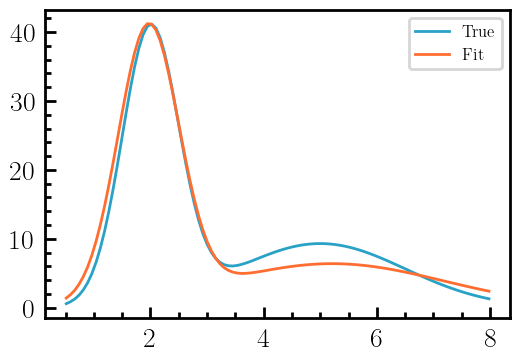

80 iterations
(59.029050961917925, 25.970949038082075, 2.061700336647677, 5.724658861789195, 0.7308582919155757, 0.9117825538376655)
(50, 35, 2, 5, 0.5, 1.5)


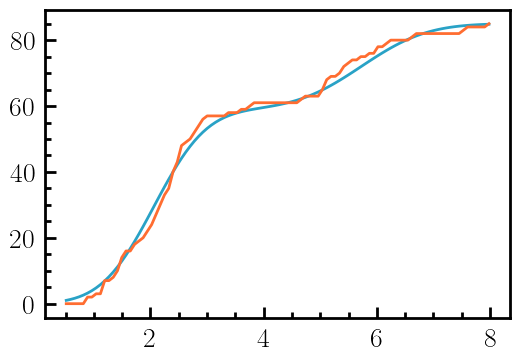

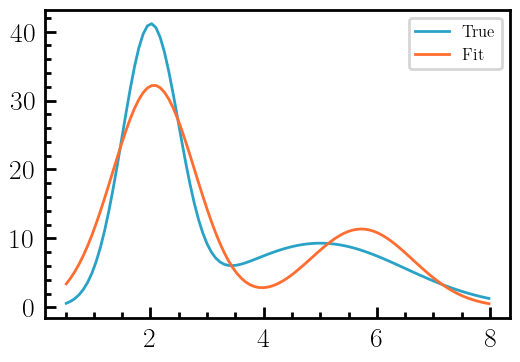

100 iterations
(59.029050961917925, 25.970949038082075, 2.040605917223626, 5.712653226065408, 0.7308582919155757, 0.8184750360405668)
(50, 35, 2, 5, 0.5, 1.5)


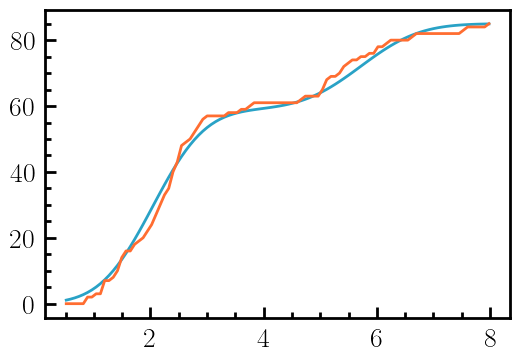

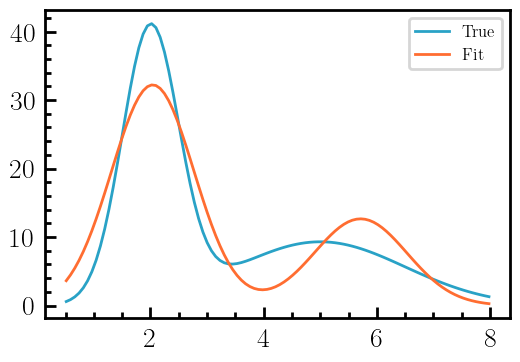

20 iterations
(44.02677759855612, 40.97322240144388, 1.863717049155521, 4.874974054784498, 0.4675101736139713, 1.4536795727828657)
(50, 35, 2, 5, 0.5, 1.5)


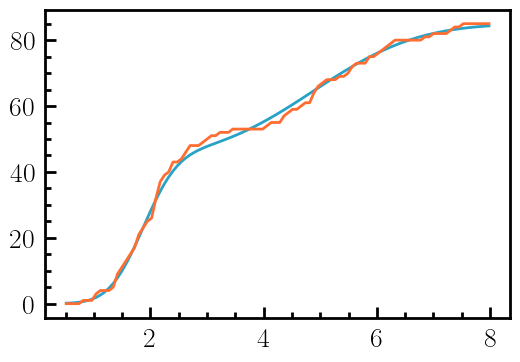

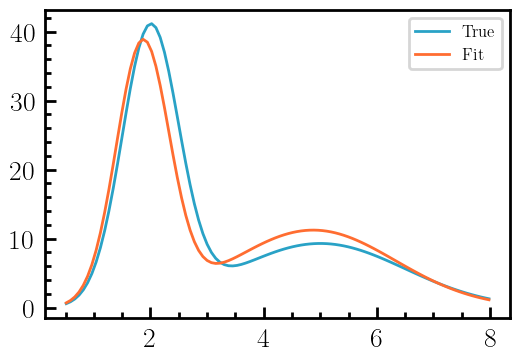

40 iterations
(50.02460004567864, 34.97539995432136, 1.9039662865253812, 5.194419068669198, 0.57325582532229, 1.1239554164347503)
(50, 35, 2, 5, 0.5, 1.5)


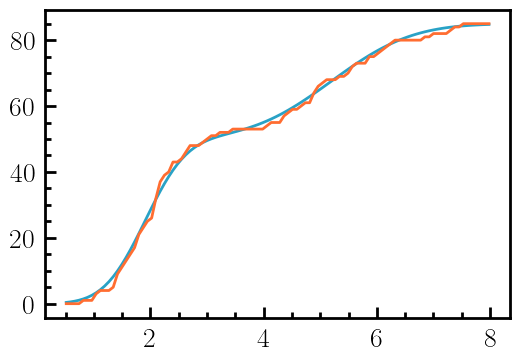

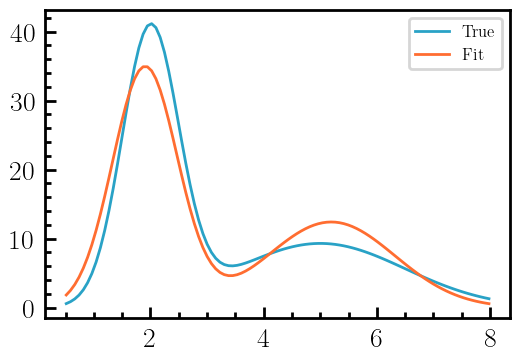

60 iterations
(50.02460004567864, 34.97539995432136, 1.9067430622742738, 5.194419068669198, 0.57325582532229, 1.1239554164347503)
(50, 35, 2, 5, 0.5, 1.5)


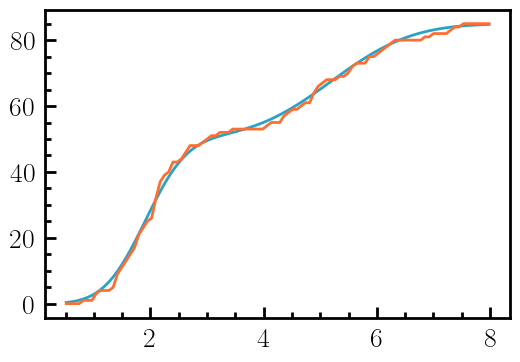

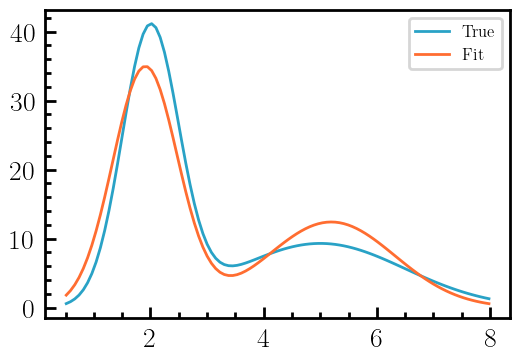

80 iterations
(50.02460004567864, 34.97539995432136, 1.9067430622742738, 5.194419068669198, 0.57325582532229, 1.1239554164347503)
(50, 35, 2, 5, 0.5, 1.5)


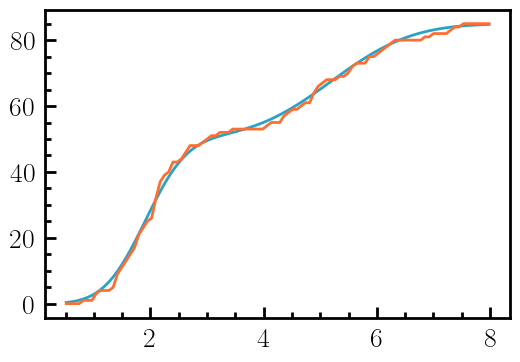

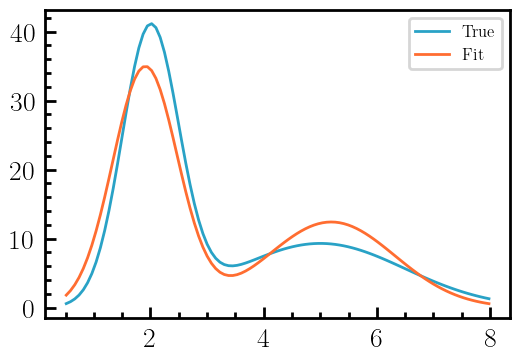

100 iterations
(50.02460004567864, 34.97539995432136, 1.9067430622742738, 5.194419068669198, 0.57325582532229, 1.1239554164347503)
(50, 35, 2, 5, 0.5, 1.5)


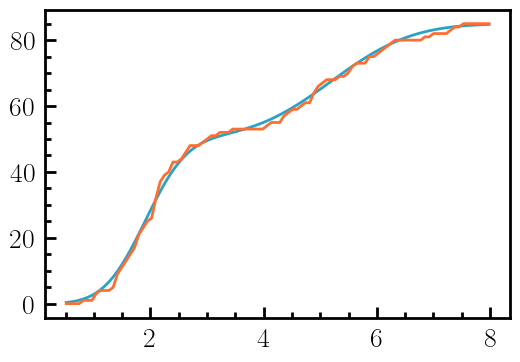

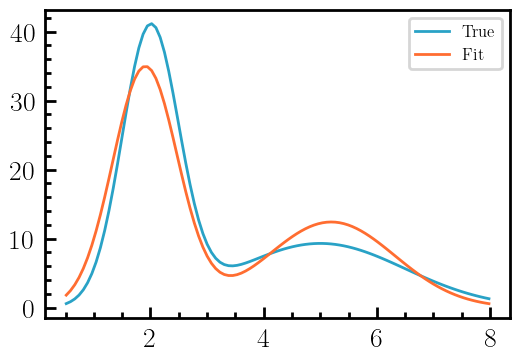

20 iterations
(52.23890177334677, 32.76109822665323, 2.055339408758626, 4.688741506991219, 0.48619109227573165, 1.4870764576746787)
(50, 35, 2, 5, 0.5, 1.5)


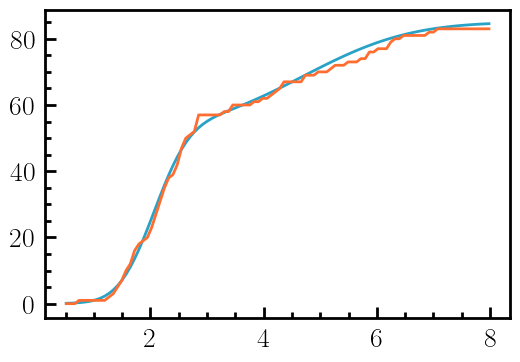

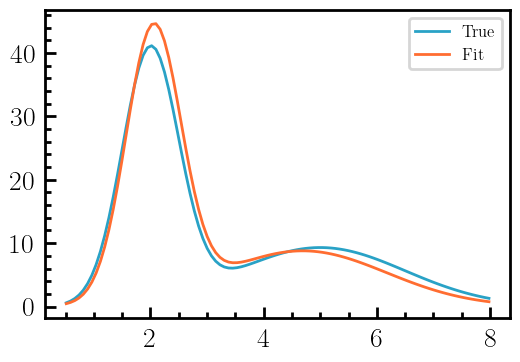

40 iterations
(52.23890177334677, 32.76109822665323, 2.055339408758626, 4.688741506991219, 0.48619109227573165, 1.5542412540706638)
(50, 35, 2, 5, 0.5, 1.5)


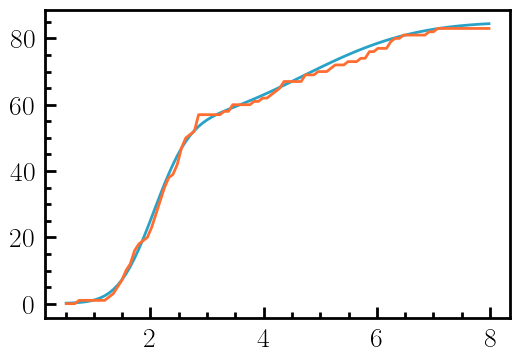

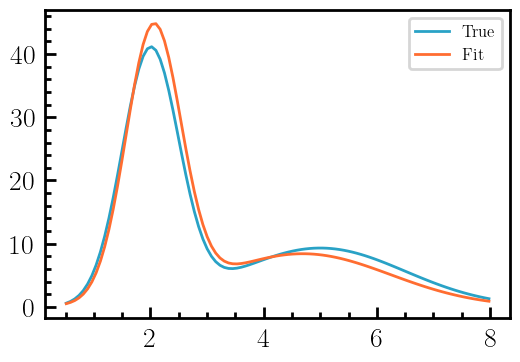

60 iterations
(56.74049200836035, 28.25950799163965, 2.182941825632871, 5.102600669791727, 0.5820821679505611, 1.9342225598115959)
(50, 35, 2, 5, 0.5, 1.5)


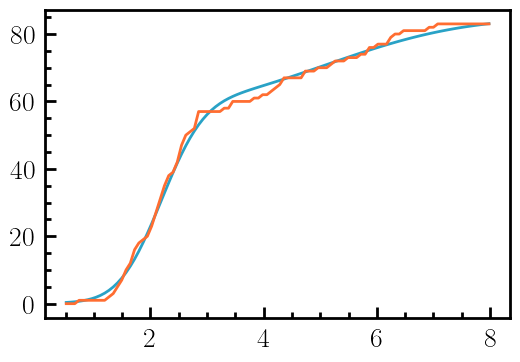

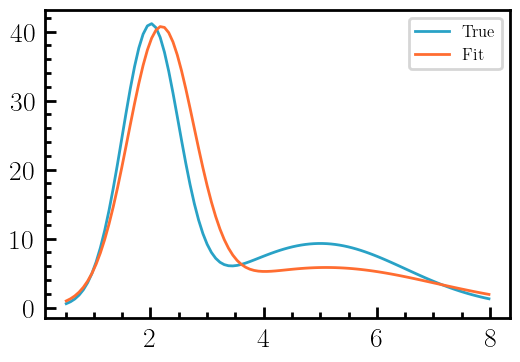

80 iterations
(56.74049200836035, 28.25950799163965, 2.182941825632871, 5.0023887723086835, 0.5820821679505611, 1.9342225598115959)
(50, 35, 2, 5, 0.5, 1.5)


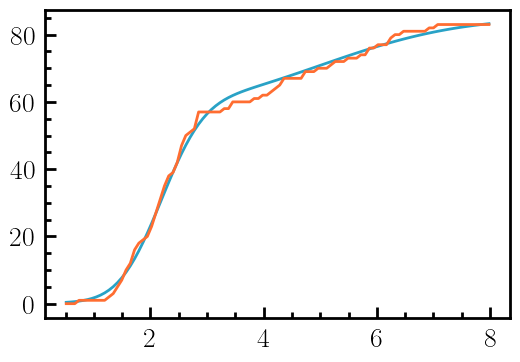

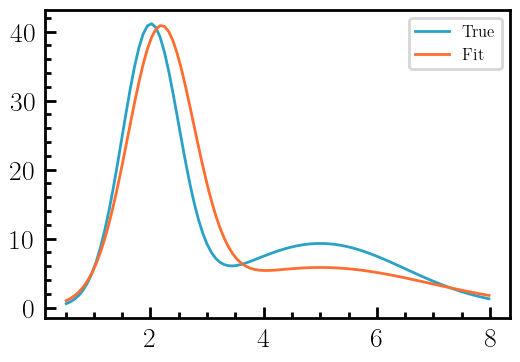

100 iterations
(43.780832386381235, 41.219167613618765, 2.01072362454683, 4.267806852942613, 0.36553555702593166, 1.7704573927757812)
(50, 35, 2, 5, 0.5, 1.5)


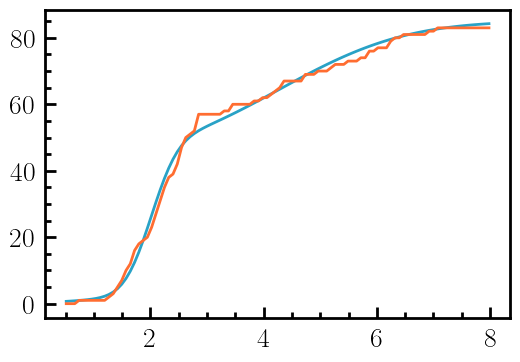

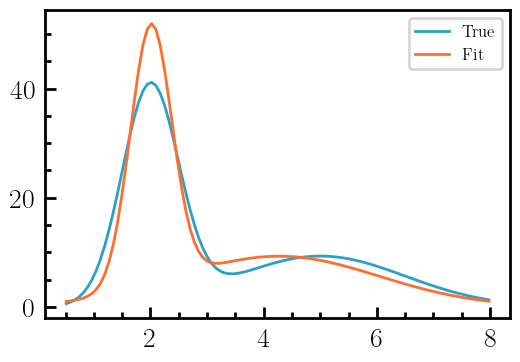

20 iterations
(44.47075491100361, 40.52924508899639, 1.90720779755934, 4.470481034251785, 0.4665105074255498, 1.9182847069097433)
(50, 35, 2, 5, 0.5, 1.5)


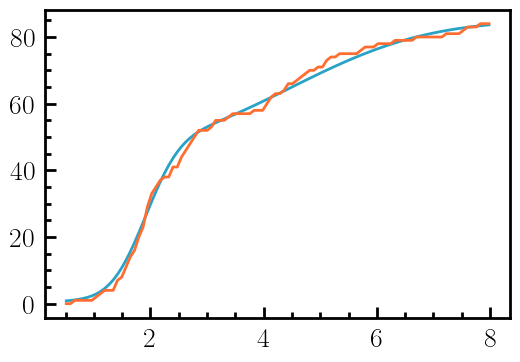

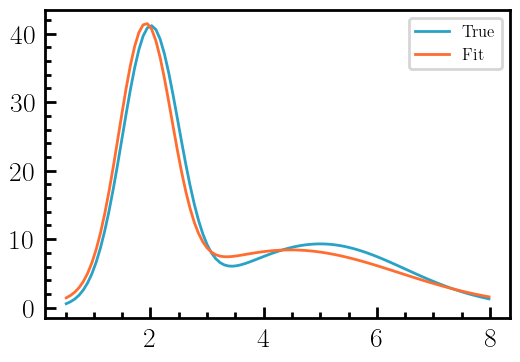

40 iterations
(44.26693031399446, 40.73306968600554, 1.9826220331746383, 4.231035664984998, 0.569244718139129, 1.732994938000784)
(50, 35, 2, 5, 0.5, 1.5)


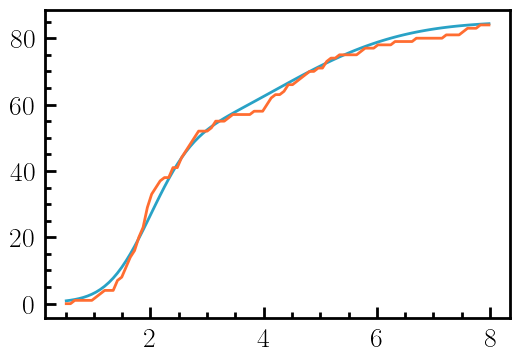

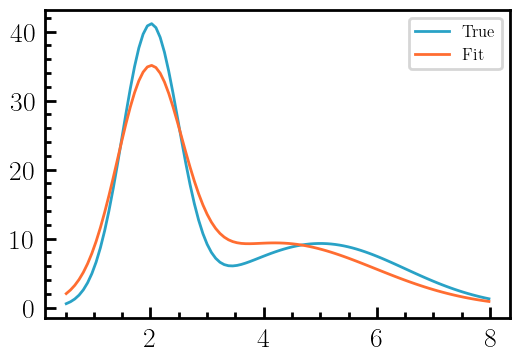

60 iterations
(41.51087270810757, 43.48912729189243, 1.8975038270083018, 4.302241675922955, 0.5087226993802576, 1.583145213824366)
(50, 35, 2, 5, 0.5, 1.5)


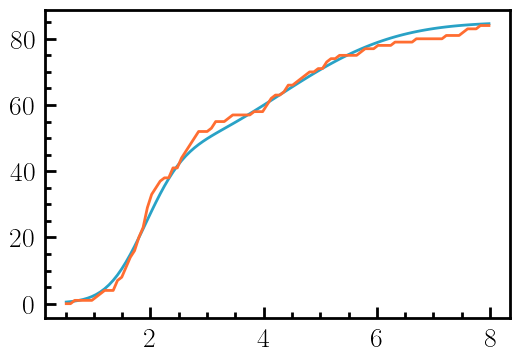

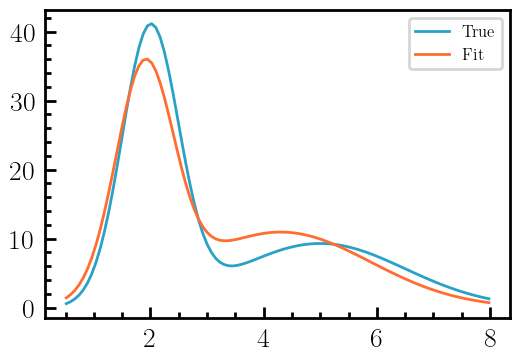

80 iterations
(44.57973017092391, 40.42026982907609, 1.8975038270083018, 4.302241675922955, 0.4176194397510675, 1.583145213824366)
(50, 35, 2, 5, 0.5, 1.5)


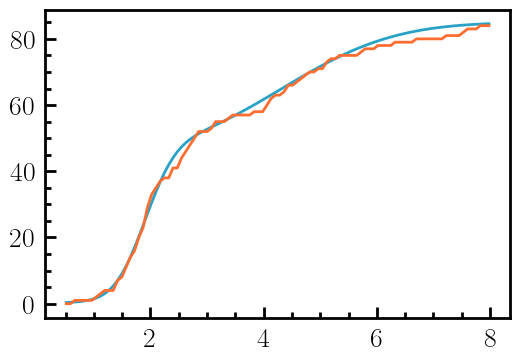

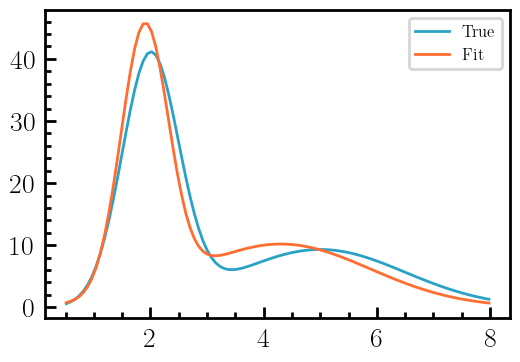

100 iterations
(55.44252004547699, 29.55747995452301, 1.978931700258944, 5.004486728531863, 0.5604151488112994, 1.2137017638946064)
(50, 35, 2, 5, 0.5, 1.5)


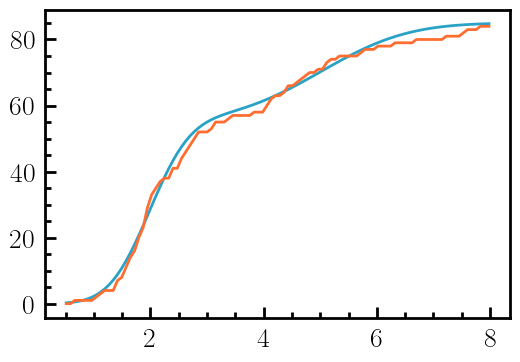

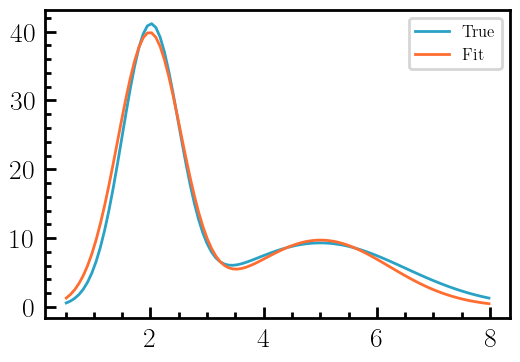

In [18]:
# This line is cheating
guess_loc1, guess_loc2 = 1.93, 4.448

MAXITER = 100

resss = []

for _ in range(10):
    times0 = np.append(
        np.random.normal(loc=loc1true, scale = scale1true, size=a1true),
        np.random.normal(loc=loc2true, scale = scale2true, size=a2true),
    )

    ress = []
    x0 = [
        53,
        guess_loc1,
        guess_loc2,
        1.6,
        1.6
    ]
    niter = 0
    niter_per = 20
    while niter < MAXITER:
        print(f"{niter+niter_per} iterations")
        g_test = lambda x: -f_test(times0, x).fun / times0.sum()
        res = differential_evolution(
            g_test,
            [
                (40, 60),
                (1, 4),
                (3, 6),
                (0.3, 2),
                (0.3, 2),
            ],
            x0=x0,
            # disp=True,
            recombination=0.0,
            # seed=1112,
            maxiter=niter_per,
            polish=True
        )
        niter += niter_per
        ress.append(res)
        # print(res.x)
        x0 = res.x
        pfit = tuple(res.x)
        pfit = (pfit[0], len(times0) - pfit[0], pfit[1], pfit[2], pfit[3], pfit[4])
        print(pfit)
        print(ptrue)
        plt.plot(ts, norm_cdf(pfit)(ts))
        plt.plot(ts, [cumulative_value(times0, t) for t in ts])
        plt.show()
        gaustrue = lambda x: ptrue[0] * norm.pdf(x, loc=ptrue[2], scale=ptrue[4]) + ptrue[1] * norm.pdf(x, loc=ptrue[3], scale=ptrue[5])
        gausfit = lambda x: pfit[0] * norm.pdf(x, loc=pfit[2], scale=pfit[4]) + pfit[1] * norm.pdf(x, loc=pfit[3], scale=pfit[5])
        plt.plot(ts, [gaustrue(t) for t in ts], label="True")
        plt.plot(ts, [gausfit(t) for t in ts], label="Fit")
        plt.legend(loc=1, fontsize=12)
        plt.show()
    resss.append(ress)
    #     gcdf = gamma_cdf_test(pfit)
    #     f_ = lambda t: -np.abs(cumulative_value(times0, t) - gcdf(t))
    #     plt.plot(ts, [f_(t) for t in ts])

    #     plt.show()